In [23]:
# Install gdown for Google Drive downloads
!pip install --quiet gdown

# Import required Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create folders for outputs and CSVs (so Colab doesn’t lose structure)
os.makedirs('csv_files', exist_ok=True)
os.makedirs('outputs', exist_ok=True)

print("Libraries imported and folders created successfully!")


Libraries imported and folders created successfully!


In [24]:
import gdown

# Google Drive file IDs
trader_file_id = "1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs"
sentiment_file_id = "1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf"

# Download using gdown
gdown.download(f"https://drive.google.com/uc?id={trader_file_id}", "historical_trader_data.csv", quiet=False)
gdown.download(f"https://drive.google.com/uc?id={sentiment_file_id}", "fear_greed_index.csv", quiet=False)

print("Files downloaded successfully!")


Downloading...
From: https://drive.google.com/uc?id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs
To: /content/historical_trader_data.csv
100%|██████████| 47.5M/47.5M [00:00<00:00, 155MB/s]
Downloading...
From: https://drive.google.com/uc?id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf
To: /content/fear_greed_index.csv
100%|██████████| 90.8k/90.8k [00:00<00:00, 22.4MB/s]

Files downloaded successfully!


In [22]:
# Load both datasets
trader_df = pd.read_csv("historical_trader_data.csv")
sentiment_df = pd.read_csv("fear_greed_index.csv")

# Display first few rows of each
print("Trader Data Preview:")
display(trader_df.head())

print("Sentiment Data Preview:")
display(sentiment_df.head())

# Check basic info
print("\nTrader Data Info:")
print(trader_df.info())

print("\nSentiment Data Info:")
print(sentiment_df.info())


Trader Data Preview:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


Sentiment Data Preview:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05



Trader Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes

In [15]:
import pandas as pd
import numpy as np


#Standardize Column Names

trader_df.columns = [col.strip().lower().replace(' ', '_') for col in trader_df.columns]
sentiment_df.columns = [col.strip().lower().replace(' ', '_') for col in sentiment_df.columns]

print("Trader columns:", trader_df.columns.tolist())
print("Sentiment columns:", sentiment_df.columns.tolist())


#Parse Dates

# Trader Data: use 'timestamp' column for datetime
trader_df['datetime'] = pd.to_datetime(trader_df['timestamp'], errors='coerce')

# Create a simple 'date' column (without time) for merging
trader_df['date'] = trader_df['datetime'].dt.date

# Sentiment Data: ensure date column
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], errors='coerce').dt.date


#Clean Numeric Columns

numeric_cols = ['execution_price', 'size_tokens', 'size_usd', 'closed_pnl', 'fee']
for col in numeric_cols:
    if col in trader_df.columns:
        trader_df[col] = pd.to_numeric(trader_df[col], errors='coerce')


#Drop Missing or Invalid Rows

# Drop rows in trader data with missing critical info
critical_cols = ['account', 'side', 'size_usd', 'execution_price']
existing_critical = [c for c in critical_cols if c in trader_df.columns]
trader_df = trader_df.dropna(subset=existing_critical, how='any')

# Drop rows where numeric conversion failed
trader_df = trader_df.dropna(subset=numeric_cols, how='any')

#Quick Sanity Checks

print("Cleaned Trader Data shape:", trader_df.shape)
print("Cleaned Sentiment Data shape:", sentiment_df.shape)

print("\nTrader Data Preview:")
display(trader_df.head())

print("\nSentiment Data Preview:")
display(sentiment_df.head())

# Check for missing dates
print("\nMissing dates in Trader Data:", trader_df['date'].isna().sum())
print("Missing dates in Sentiment Data:", sentiment_df['date'].isna().sum())


Trader columns: ['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side', 'timestamp_ist', 'start_position', 'direction', 'closed_pnl', 'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id', 'timestamp']
Sentiment columns: ['timestamp', 'value', 'classification', 'date']
Cleaned Trader Data shape: (211224, 18)
Cleaned Sentiment Data shape: (2644, 4)

Trader Data Preview:


,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp,datetime,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,1970-01-01 00:28:50,1970-01-01
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,1970-01-01 00:28:50,1970-01-01
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,1970-01-01 00:28:50,1970-01-01
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,1970-01-01 00:28:50,1970-01-01
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,1970-01-01 00:28:50,1970-01-01



Sentiment Data Preview:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05



Missing dates in Trader Data: 0
Missing dates in Sentiment Data: 0


In [17]:

#Merge Datasets

import pandas as pd

# Make copies of cleaned data
merged_trader = trader_df.copy()
merged_sentiment = sentiment_df.copy()


#Convert Unix timestamp to datetime

# Trader 'timestamp' is in milliseconds since epoch
merged_trader['datetime'] = pd.to_datetime(merged_trader['timestamp'], unit='ms', errors='coerce')

# Create a simple 'date' column for merging
merged_trader['date'] = merged_trader['datetime'].dt.date

# Convert date to string for exact merge
merged_trader['date_str'] = merged_trader['date'].astype(str)

# Sentiment data: convert 'date' to string
merged_sentiment['date_str'] = pd.to_datetime(merged_sentiment['date'], errors='coerce').dt.date.astype(str)


#Merge on date_str

merged_df = pd.merge(
    merged_trader,
    merged_sentiment[['date_str', 'classification']],
    on='date_str',
    how='left'
)

#Quick Checks

print("Merged Data shape:", merged_df.shape)
print("Missing sentiment labels:", merged_df['classification'].isna().sum())

# Count trades per sentiment
print("Trades per sentiment:")
display(merged_df['classification'].value_counts())

# Preview merged dataset
display(merged_df.head())


Merged Data shape: (211224, 20)
Missing sentiment labels: 26961
Trades per sentiment:


,count
classification,
Fear,133871
Greed,36289
Neutral,7141
Extreme Greed,6962


,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp,datetime,date,date_str,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27,2024-10-27,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27,2024-10-27,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27,2024-10-27,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-10-27 03:33:20,2024-10-27,2024-10-27,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-10-27 03:33:20,2024-10-27,2024-10-27,Greed


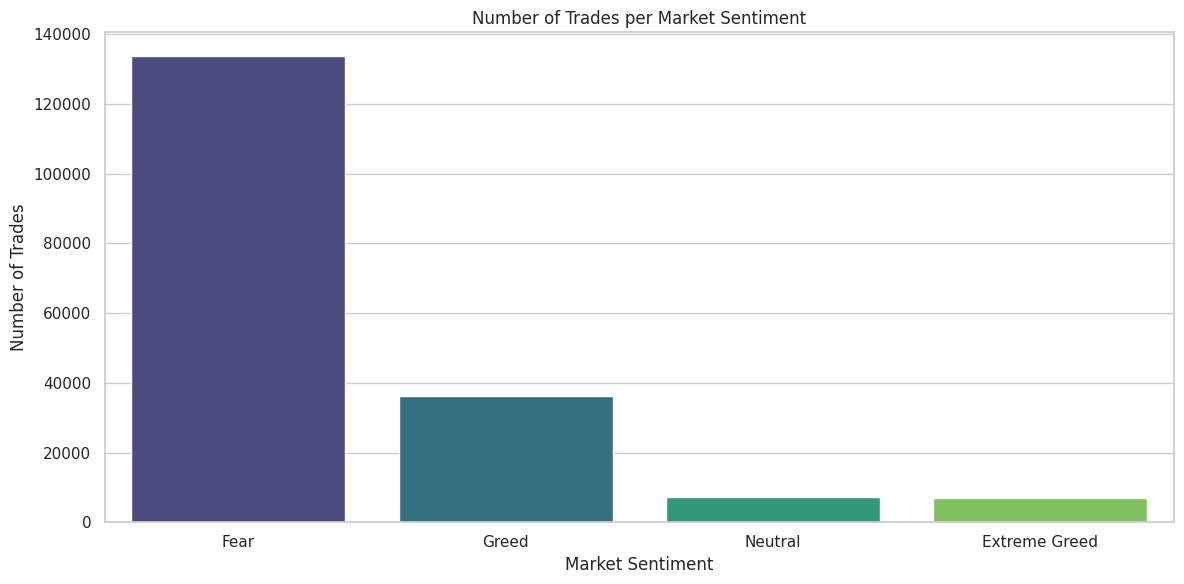

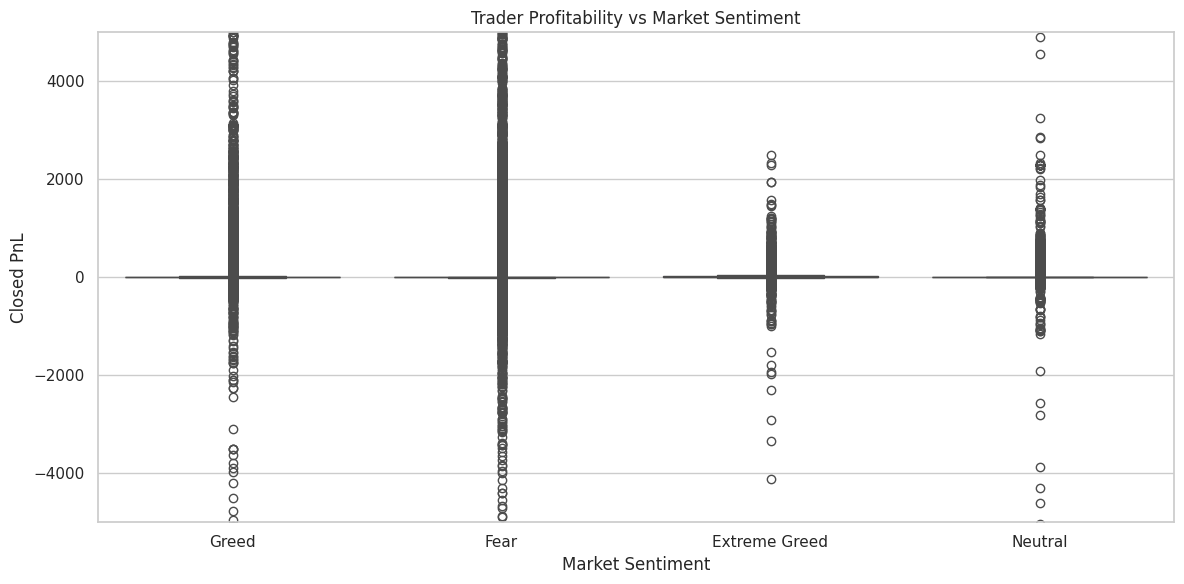

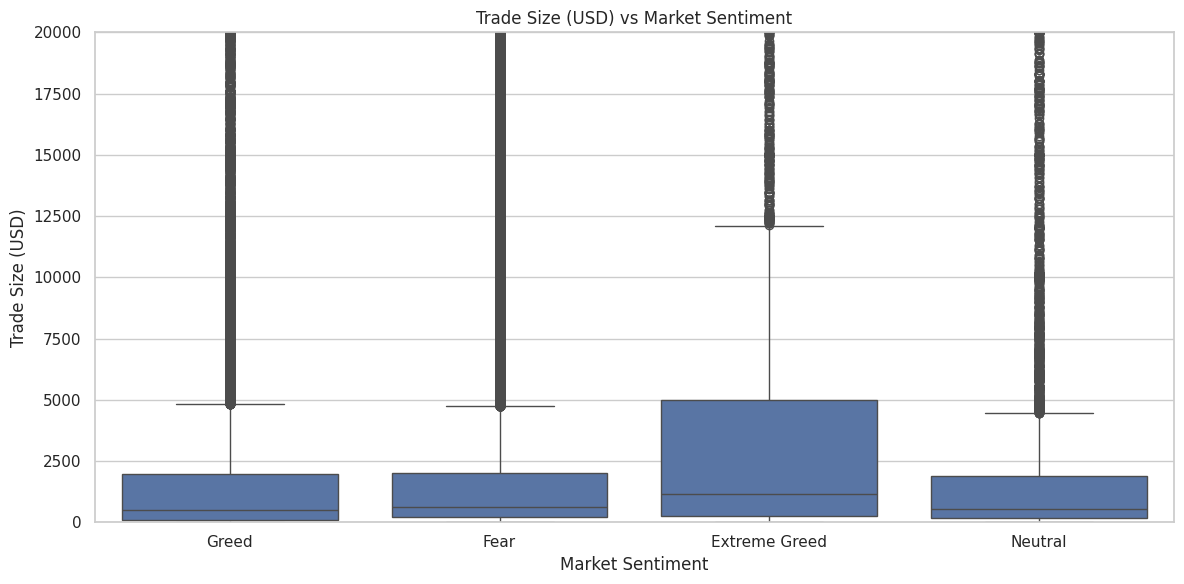

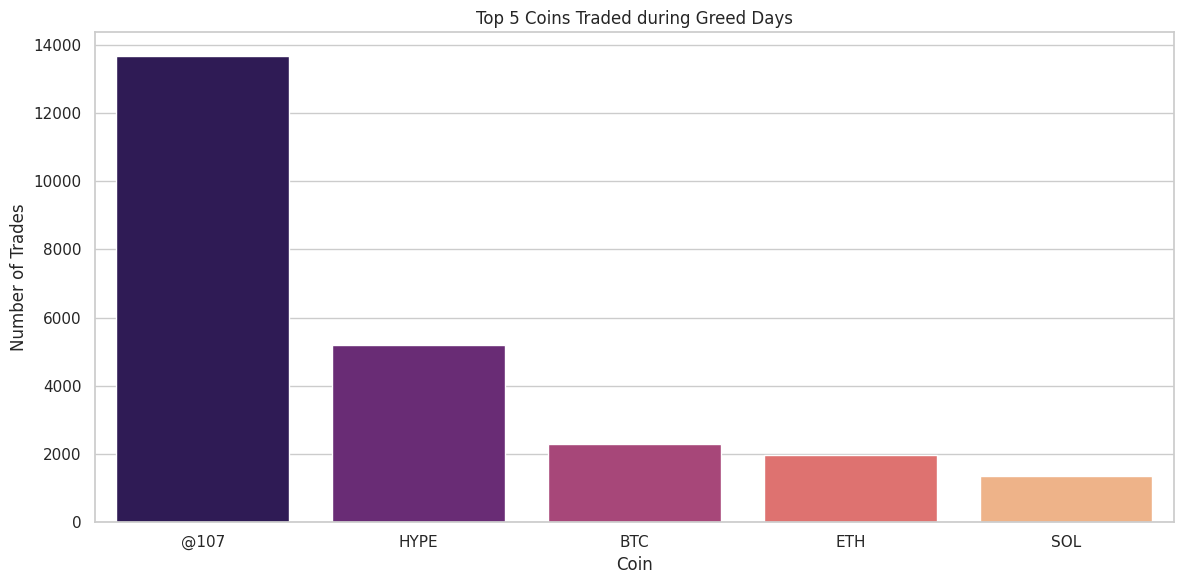

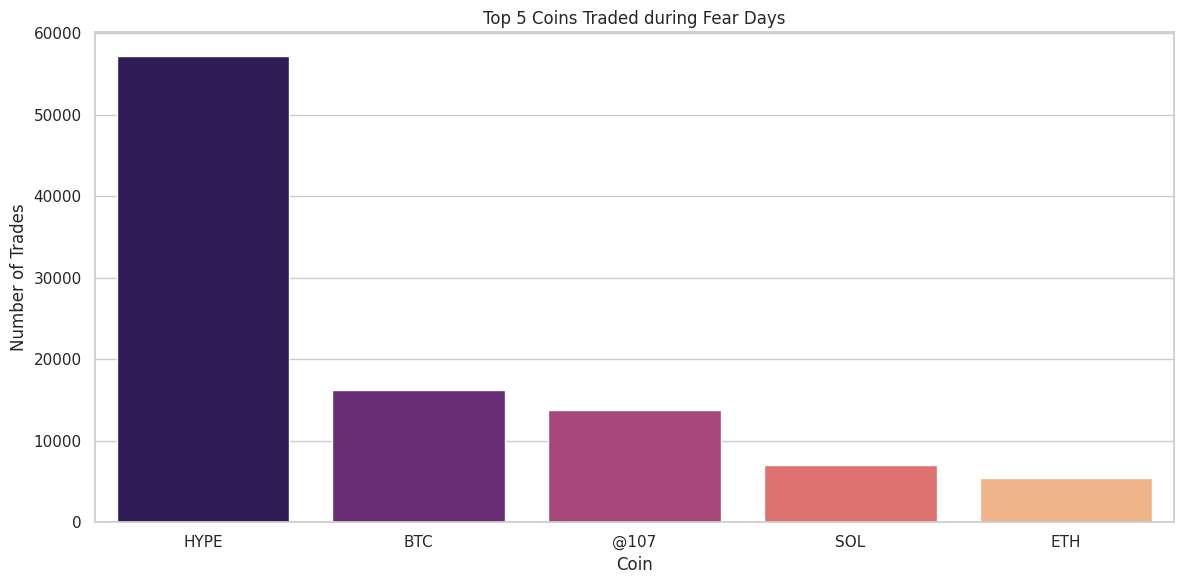

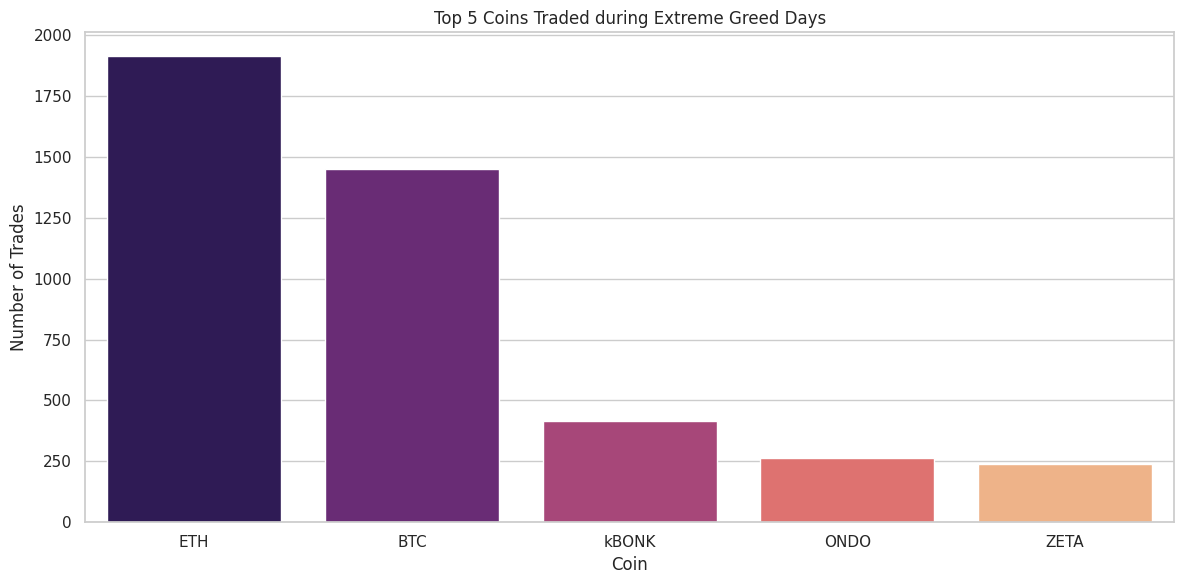

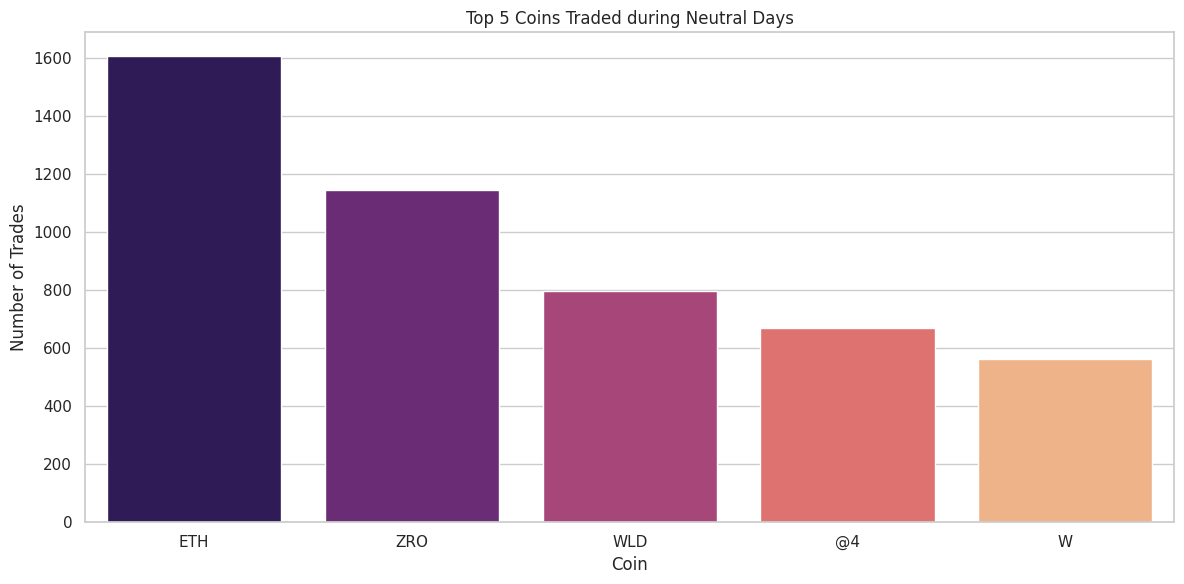

In [20]:
#EDA & Visualization with plot saving

import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

# Create outputs folder if it doesn't exist
output_dir = "outputs"
os.makedirs(output_dir, exist_ok=True)


#Number of Trades per Sentiment

trade_counts = merged_df['classification'].value_counts().reset_index()
trade_counts.columns = ['classification', 'trade_count']

plt.figure()
sns.barplot(
    x='classification',
    y='trade_count',
    data=trade_counts,
    hue='classification',
    dodge=False,
    palette="viridis",
    legend=False
)
plt.title("Number of Trades per Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Number of Trades")
plt.tight_layout()
plt.savefig(f"{output_dir}/trades_per_sentiment.png")
plt.show()


#Profitability (Closed PnL) vs Sentiment

plt.figure()
sns.boxplot(x='classification', y='closed_pnl', data=merged_df)
plt.title("Trader Profitability vs Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Closed PnL")
plt.ylim(-5000, 5000)
plt.tight_layout()
plt.savefig(f"{output_dir}/profitability_vs_sentiment.png")
plt.show()


#Trade Size (size_usd) vs Sentiment

plt.figure()
sns.boxplot(x='classification', y='size_usd', data=merged_df)
plt.title("Trade Size (USD) vs Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Trade Size (USD)")
plt.ylim(0, 20000)
plt.tight_layout()
plt.savefig(f"{output_dir}/trade_size_vs_sentiment.png")
plt.show()

#Leverage vs Sentiment (if column exists)

if 'leverage' in merged_df.columns:
    plt.figure()
    sns.boxplot(x='classification', y='leverage', data=merged_df)
    plt.title("Leverage vs Market Sentiment")
    plt.xlabel("Market Sentiment")
    plt.ylabel("Leverage")
    plt.tight_layout()
    plt.savefig(f"{output_dir}/leverage_vs_sentiment.png")
    plt.show()

#Top 10 Traded Coins per Sentiment

top_coins = merged_df.groupby(['classification', 'coin']).size().reset_index(name='trade_count')
top_coins = top_coins.sort_values(['classification', 'trade_count'], ascending=[True, False])

for sentiment in merged_df['classification'].dropna().unique():
    subset = top_coins[top_coins['classification'] == sentiment].head(5)
    plt.figure()
    sns.barplot(
        x='coin',
        y='trade_count',
        data=subset,
        hue='coin',
        dodge=False,
        palette="magma",
        legend=False
    )
    plt.title(f"Top 5 Coins Traded during {sentiment} Days")
    plt.xlabel("Coin")
    plt.ylabel("Number of Trades")
    plt.tight_layout()
    # Save with sentiment name
    safe_sentiment = sentiment.replace(" ", "_")
    plt.savefig(f"{output_dir}/top5_coins_{safe_sentiment}.png")
    plt.show()
